<a href="https://colab.research.google.com/github/raghadS4545/YUMYUM/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3

# Introduction

In this analysis, we will first assess whether our dataset is balanced or imbalanced by examining the distribution of the target variable, "Average Score." Understanding the balance of our dataset is crucial, as it can significantly impact the performance of the classification and clustering methods we will apply in Phase 2.

After preprocessing the dataset, we will proceed with applying various classification and clustering techniques. Finally, we will evaluate the performance of these methods to understand their effectiveness in predicting and grouping the data.

Let's begin by analyzing the balance of our dataset.

In [15]:
import pandas as pd
df = pd.read_csv("Preprocessed_dataset.csv")

# Target column: Replace 'Average Score' with the column you're analyzing
target_column = "Average Score"  # Adjust this to your target column
threshold = 0.07  # Adjust threshold for binary classification if needed

# Convert target variable to binary (e.g., high/low)
binary_target = (df[target_column] >= threshold).astype(int)

# Calculate the number of instances for each class
num_high = binary_target[binary_target == 1].count()
num_low = binary_target[binary_target == 0].count()

# Calculate the percentages
total = num_high + num_low
percentage_high = (num_high / total) * 100
percentage_low = (num_low / total) * 100

# Display results
print("Number of High:", num_high)
print("Number of Low:", num_low)
print("___")
print("Percentage of High: {:.2f}%".format(percentage_high))
print("Percentage of Low: {:.2f}%".format(percentage_low))

# Assess balance
if 40 <= percentage_high <= 60:
    print("\nThe dataset is balanced.")
else:
    print("\nThe dataset is imbalanced.")


Number of High: 14106
Number of Low: 16535
___
Percentage of High: 46.04%
Percentage of Low: 53.96%

The dataset is balanced.


#**1. Importing Necessary Libraries**

Now, we will import the necessary libraries to handle data processing, visualization, and machine learning. This includes libraries for data manipulation (Pandas), numerical operations (NumPy), plotting (Matplotlib and Seaborn), and implementing decision tree classification (scikit-learn).

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Preprocessed_dataset.csv")
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,Average Score
0,0,0,5,1,1,married,1,1,Moderate,< 5,0.072000
1,1,0,2,4,2,married,2,1,NaN,5 - 10,0.082333
2,2,0,1,3,1,single,2,1,Moderate,< 5,0.090333
3,3,1,0,0,1,married,0,0,Few,5 - 10,0.047667
4,4,1,2,4,1,married,2,1,NaN,5 - 10,0.076333
...,...,...,...,...,...,...,...,...,...,...,...
30636,816,0,3,2,1,single,2,0,Few,5 - 10,0.061667
30637,890,1,4,2,1,single,1,0,Few,5 - 10,0.054000
30638,911,0,5,2,0,married,2,0,Few,5 - 10,0.066000
30639,934,0,3,0,0,married,1,0,Moderate,5 - 10,0.088333



#2. Feature Selection:

In [11]:
print("Columns in the DataFrame:")
print(df.columns.tolist())

# Define Features (X) and Target Variable (y)
# Replace 'Average Score' with the correct column name if it differs
fn = df.columns.tolist()[:-1]  # All columns except the last one (target)
X = df[fn]
# Confirm the target column name
target_column = "Average Score"  # Adjusting if the name differs
if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found in DataFrame!")

y = (df[target_column] >= 0.07).astype(int)

Columns in the DataFrame:
['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'WklyStudyHours', 'Average Score']


In [12]:
#Handle Missing Values Using .loc Safely
# Safely handle missing values in specific columns
categorical_columns = ['ParentMaritalStatus', 'NrSiblings', 'WklyStudyHours']
for col in categorical_columns:
    if col in X.columns:
        X.loc[:, col] = X.loc[:, col].fillna('Unknown')  # Explicitly use .loc to suppress warnings

print("\nMissing values handled successfully.")

#Encode Categorical Variables
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

print("\nEncoded Data Preview:")
print(X_encoded.head())


Missing values handled successfully.

Encoded Data Preview:
   Unnamed: 0  Gender  EthnicGroup  ParentEduc  TestPrep  PracticeSport  \
0           0       0            5           1         1              1   
1           1       0            2           4         2              2   
2           2       0            1           3         1              2   
3           3       1            0           0         1              0   
4           4       1            2           4         1              2   

   IsFirstChild  ParentMaritalStatus_divorced  ParentMaritalStatus_married  \
0             1                         False                         True   
1             1                         False                         True   
2             1                         False                        False   
3             0                         False                         True   
4             1                         False                         True   

   ParentMaritalSta

#**3. Splitting Data into:**

Now, we'll conduct experiments to determine the optimal size for splitting our dataset into training and testing sets. This process will help us choose the appropriate ratio for training and testing data, ensuring reliable model evaluation.


In [13]:
def evaluate_model(X, y, split_size, criterion, max_depth=5):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=1)

    # Initialize and train the Decision Tree model
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=1)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate TP, TN, FP, and FN
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()  # Unpack confusion matrix elements

    # Calculate additional metrics
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    error_rate = 1 - accuracy

    # Display Decision Tree
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=X_encoded.columns, class_names=['0 (low)', '1 (high)'], filled=True)
    plt.title(f"Decision Tree ({int((1 - split_size) * 100)}%-{int(split_size * 100)}% Split, Criterion: {criterion})")
    plt.show()

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0 (low)', '1 (high)'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix ({int((1 - split_size) * 100)}%-{int(split_size * 100)}%, Criterion: {criterion})")
    plt.show()

    # Print metrics
    print(f"Partition {int((1 - split_size) * 100)}%-{int(split_size * 100)}, Criterion: {criterion}")
    print("Accuracy:", accuracy)
    print("Error Rate:", error_rate)
    print("True Positives (TP):", TP)
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)
    print("Sensitivity (Recall):", sensitivity)
    print("Specificity:", specificity)
    print("Precision:", precision)
    print("\n")

    # Return metrics for summary
    return {
        "accuracy": accuracy,
        "error_rate": error_rate,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "precision": precision,
        "TP": TP,
        "TN": TN,
        "FP": FP,
        "FN": FN
    }



# Splitting Data into: 90% Training and 10% Test



*  DecisionTree & confusion matrix &
evaluatie









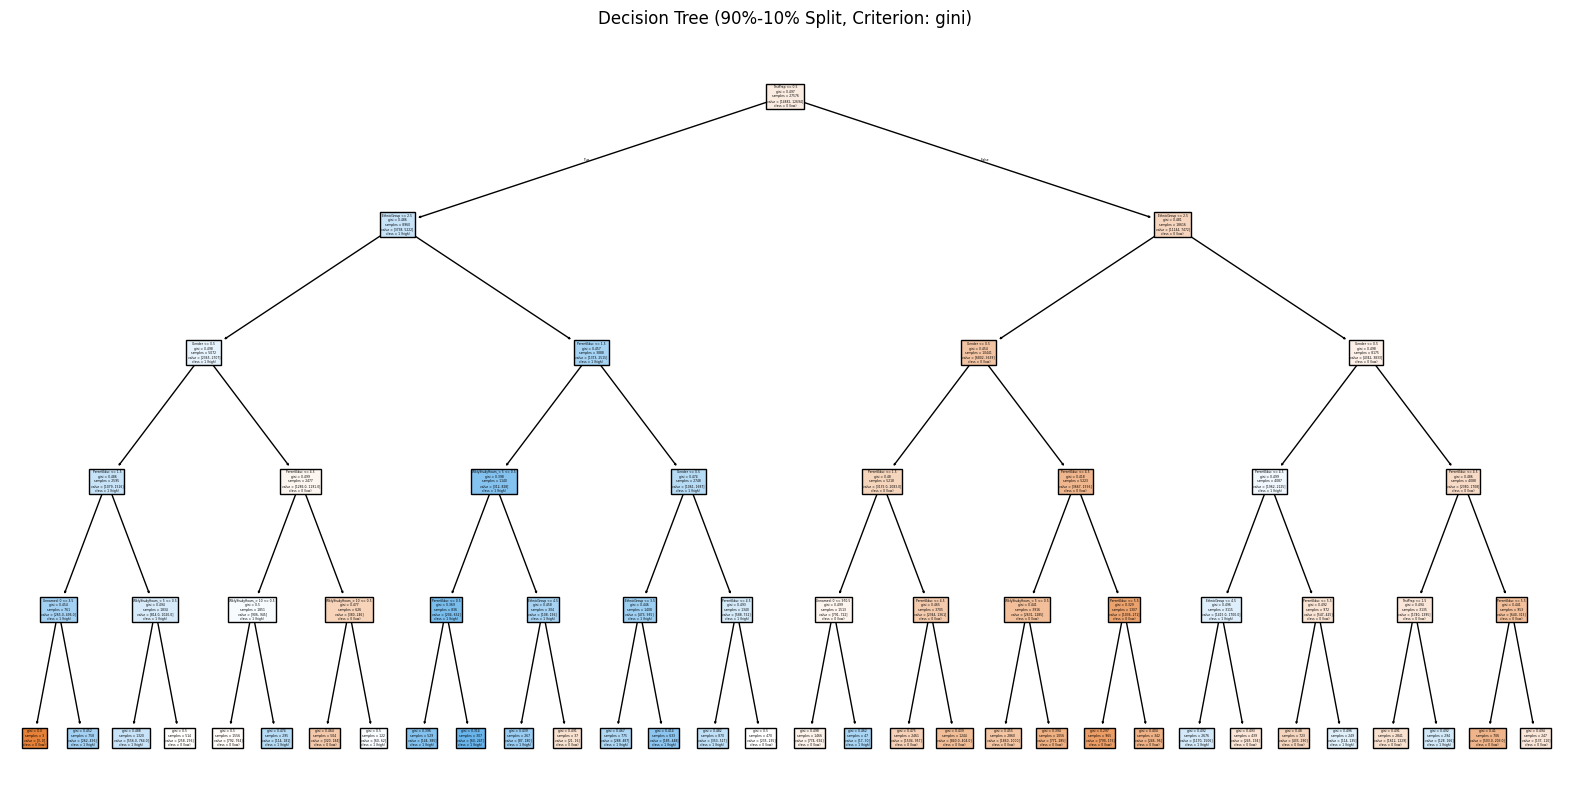

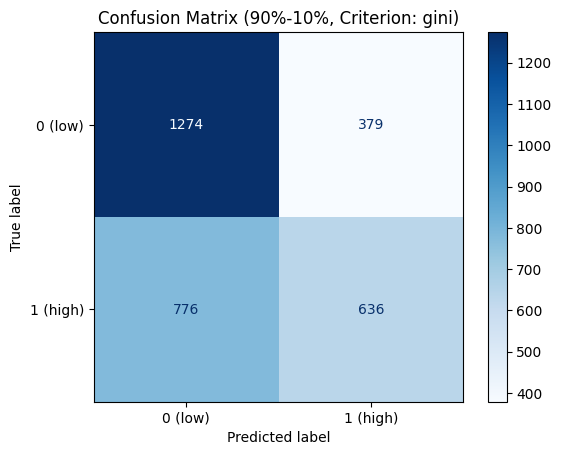

Partition 90%-10, Criterion: gini
Accuracy: 0.6231647634584013
Error Rate: 0.3768352365415987
True Positives (TP): 636
True Negatives (TN): 1274
False Positives (FP): 379
False Negatives (FN): 776
Sensitivity (Recall): 0.45042492917847027
Specificity: 0.7707199032062916
Precision: 0.6266009852216748




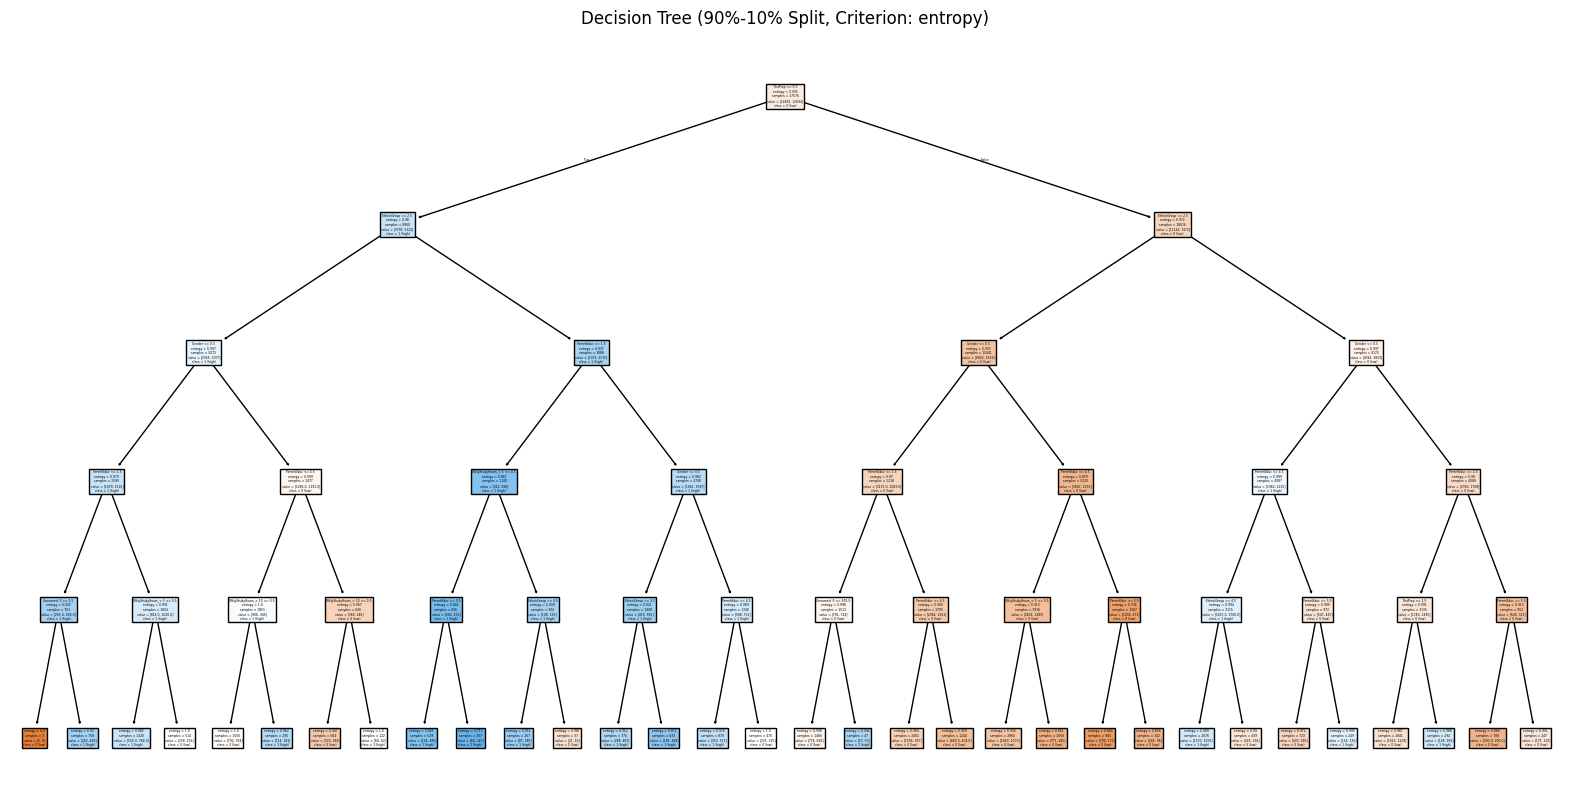

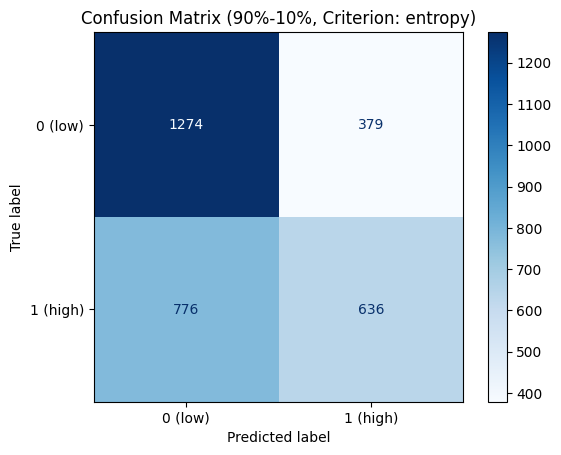

Partition 90%-10, Criterion: entropy
Accuracy: 0.6231647634584013
Error Rate: 0.3768352365415987
True Positives (TP): 636
True Negatives (TN): 1274
False Positives (FP): 379
False Negatives (FN): 776
Sensitivity (Recall): 0.45042492917847027
Specificity: 0.7707199032062916
Precision: 0.6266009852216748




In [14]:
# Define partition and criteria
split_size = 0.1  # 10% for testing
criteria = ["gini", "entropy"]

# Evaluate both criteria for 90%-10% split
results_90_10 = {}
for criterion in criteria:
    results_90_10[criterion] = evaluate_model(X_encoded, y, split_size, criterion)


classified instances out of the total instances. For example, if the accuracy is 0.9 or 90%, it means that the model correctly classified 90% of the instances.

---

Error Rate: Error Rate (Misclassification Rate) measures the proportion of incorrectly classified instances out of the total instances. An error rate of 0.1 or 10% means that 10% of the instances were misclassified.


---


Sensitivity (True Positive Rate): Sensitivity measures the proportion of actual positive instances that were correctly identified. If the sensitivity is 85%, it means that 85% of actual positive cases were accurately identified by the model.


---


Specificity (True Negative Rate): Specificity measures the proportion of actual negative instances that were correctly identified. For example, a specificity of 80% means that 80% of negative cases were correctly classified.


---

Precision (Positive Predictive Value):
Precision calculates the proportion of correctly predicted positive instances out of all predicted positive instances. If precision is 88%, it means that 88% of the predicted positive cases were indeed positive.



---





# Splitting Data into: 80% Training and 20% Test



*  DecisionTree & confusion matrix &
evaluatie









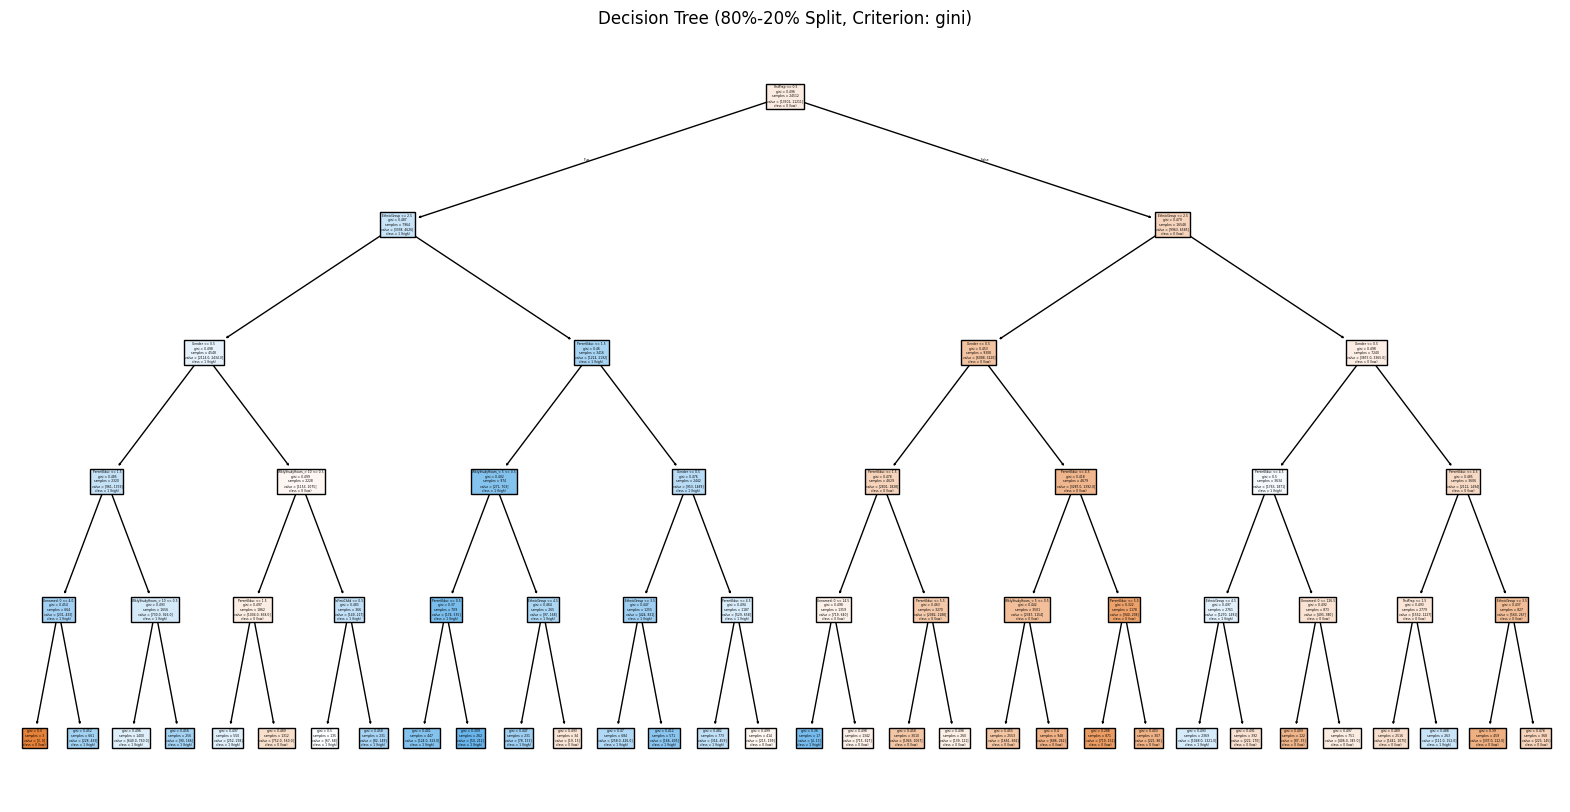

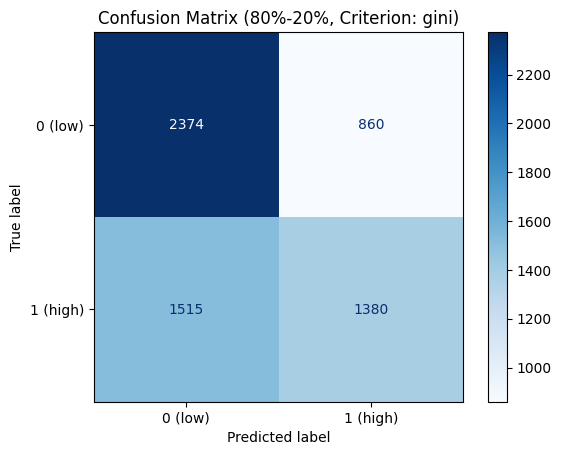

Partition 80%-20, Criterion: gini
Accuracy: 0.6124979605155817
Error Rate: 0.3875020394844183
True Positives (TP): 1380
True Negatives (TN): 2374
False Positives (FP): 860
False Negatives (FN): 1515
Sensitivity (Recall): 0.47668393782383417
Specificity: 0.7340754483611627
Precision: 0.6160714285714286




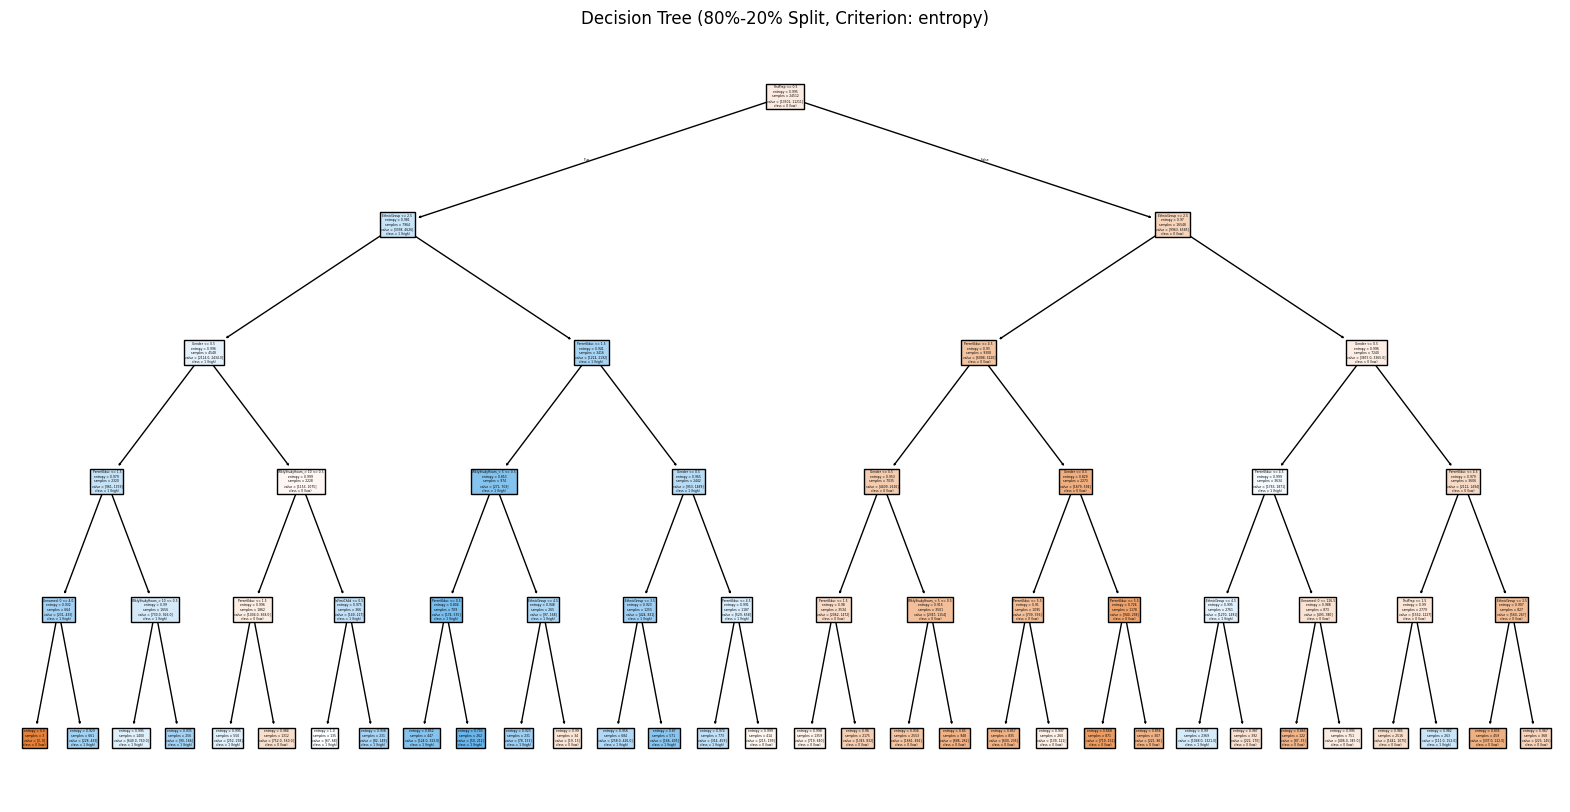

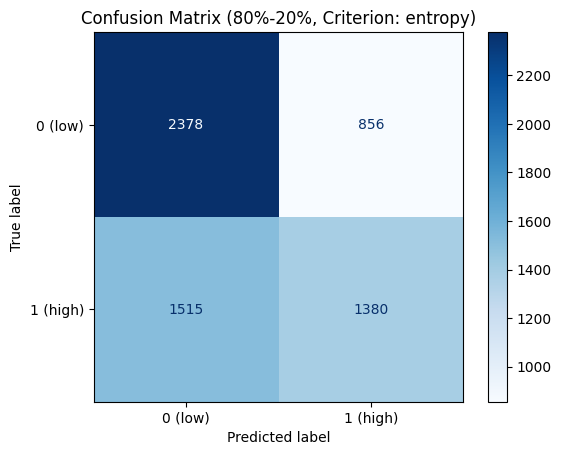

Partition 80%-20, Criterion: entropy
Accuracy: 0.6131505955294502
Error Rate: 0.38684940447054983
True Positives (TP): 1380
True Negatives (TN): 2378
False Positives (FP): 856
False Negatives (FN): 1515
Sensitivity (Recall): 0.47668393782383417
Specificity: 0.7353123067408782
Precision: 0.6171735241502684




In [ ]:
# Define partition and criteria
split_size = 0.2  # 20% for testing

# Evaluate both criteria for 80%-20% split
results_80_20 = {}
for criterion in criteria:
    results_80_20[criterion] = evaluate_model(X_encoded, y, split_size, criterion)


Accuracy: In the 80%-20% split, accuracy measures the percentage of correctly classified instances. This metric may vary slightly depending on the instances chosen for the test set.


---


Error Rate: The error rate might increase if the model is less effective in classifying the new test samples accurately. For example, if 20% of the cases are incorrect, the error rate would be 0.2.


---


Sensitivity: Sensitivity here reflects the model's ability to detect actual positive cases. For instance, if sensitivity is 70%, it means that the model correctly identified 70% of the positive cases.


---


Specificity: Specificity measures the percentage of actual negatives that the model correctly classified. If specificity is 75%, it indicates that 75% of negative cases were classified correctly.


---


Precision: Precision here assesses the accuracy of positive predictions out of all predicted positive instances. For example, if precision is 82%, it means that 82% of the instances predicted as positive were truly positive.


---



#Splitting Data into: 70% Training and 30% Test



*  DecisionTree & confusion matrix &
evaluatie









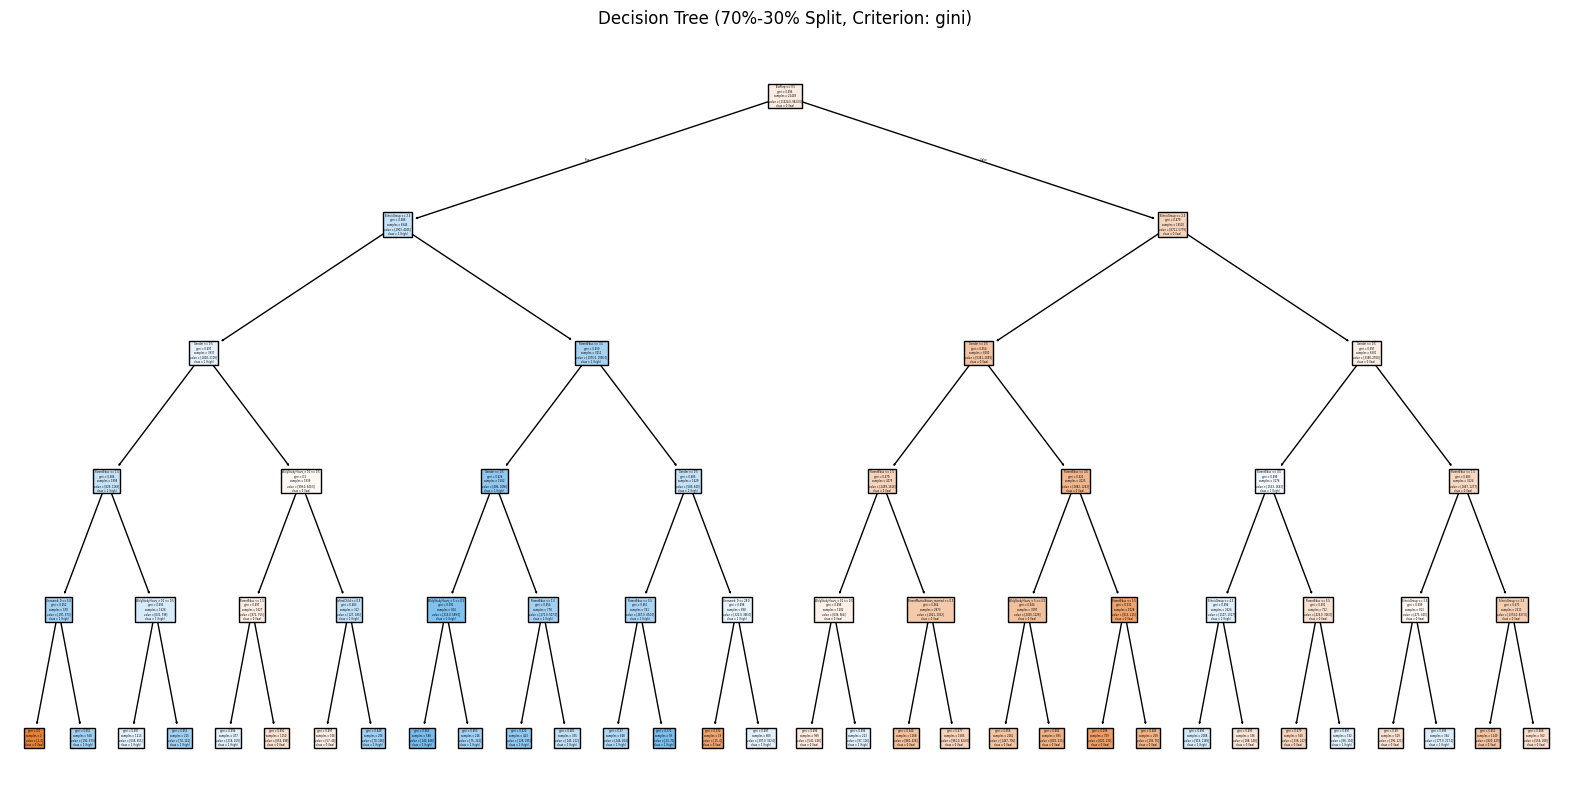

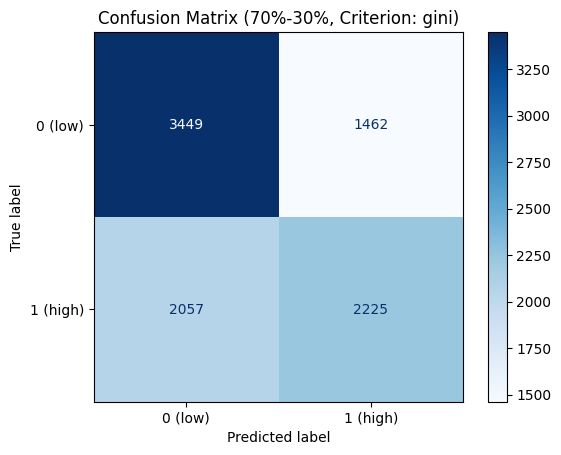

Partition 70%-30, Criterion: gini
Accuracy: 0.6172087457848363
Error Rate: 0.3827912542151637
True Positives (TP): 2225
True Negatives (TN): 3449
False Positives (FP): 1462
False Negatives (FN): 2057
Sensitivity (Recall): 0.5196170014012144
Specificity: 0.702300957035227
Precision: 0.6034716571738541




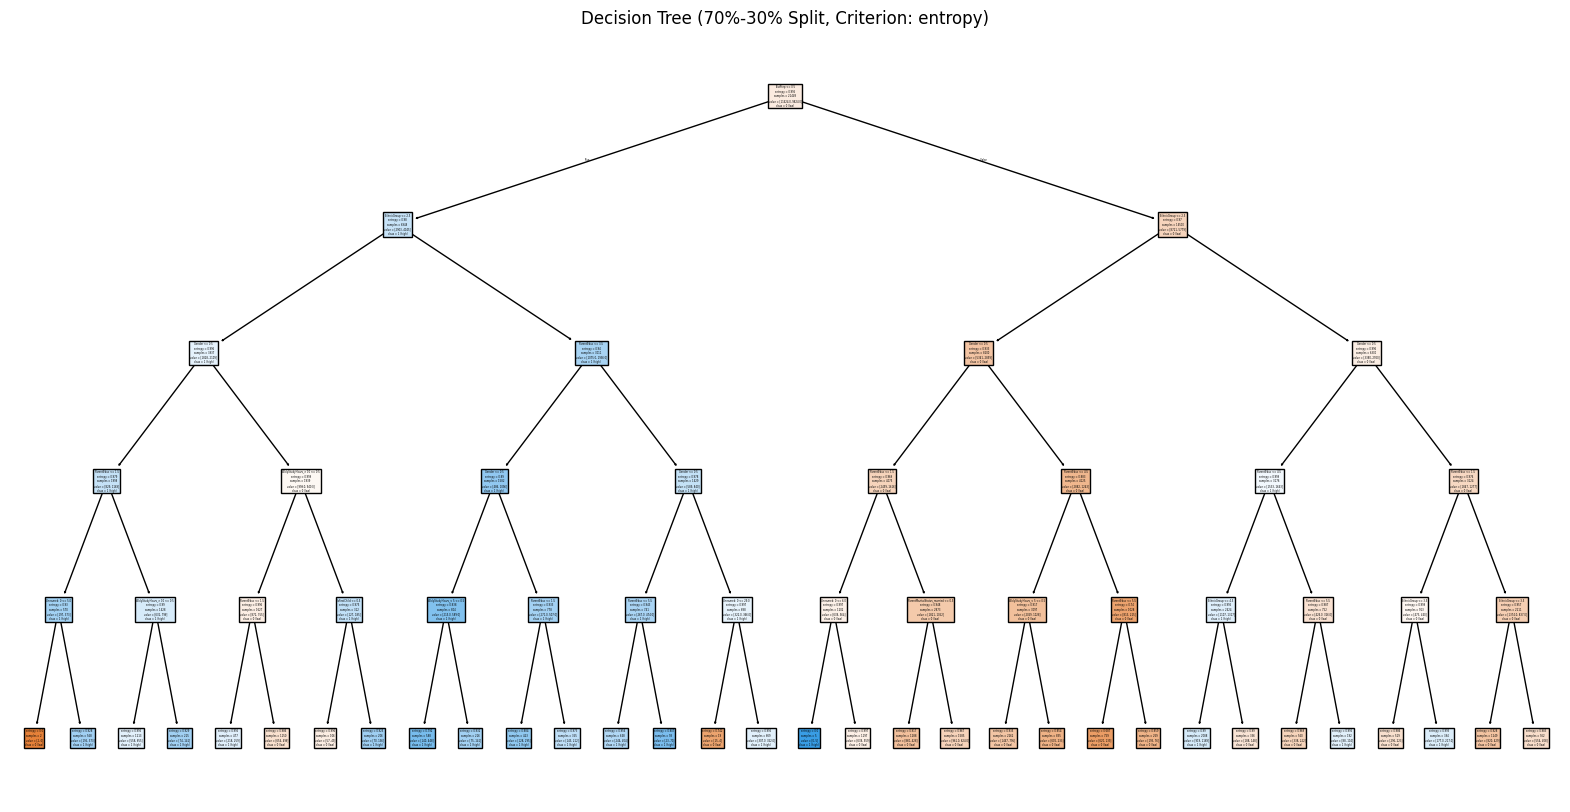

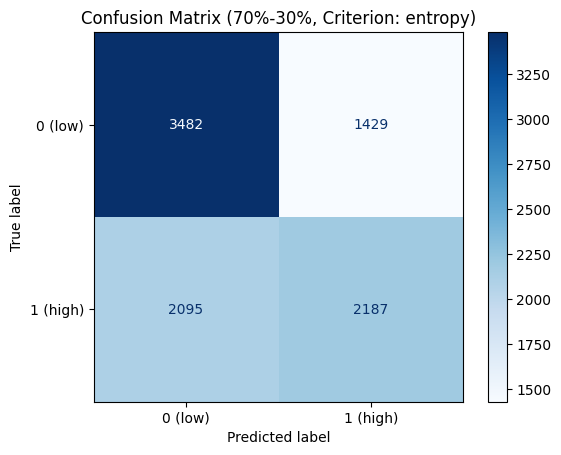

Partition 70%-30, Criterion: entropy
Accuracy: 0.6166648536930273
Error Rate: 0.38333514630697274
True Positives (TP): 2187
True Negatives (TN): 3482
False Positives (FP): 1429
False Negatives (FN): 2095
Sensitivity (Recall): 0.5107426436244745
Specificity: 0.7090205660761556
Precision: 0.6048119469026548




In [ ]:
# Define partition and criteria
split_size = 0.3  # 30% for testing

# Evaluate both criteria for 70%-30% split
results_70_30 = {}
for criterion in criteria:
    results_70_30[criterion] = evaluate_model(X_encoded, y, split_size, criterion)


Accuracy: With a 70%-30% split, accuracy represents the correct predictions as a proportion of all predictions. The larger test set may lead to a slightly different accuracy rate compared to smaller splits.


---


Error Rate: A higher percentage of test data may affect the error rate, as the model is tested on a broader variety of instances. For example, if the error rate is 0.25, it indicates that 25% of the predictions were incorrect.


---


Sensitivity: Sensitivity in this split configuration measures how well the model detects positive instances across a more extensive test set. A sensitivity rate of 65% means that 65% of the true positives were correctly identified.


---


Specificity: Specificity here shows the model's ability to identify negative instances correctly in a broader test sample. If specificity is 70%, it means that 70% of the actual negative cases were correctly classified.


---


Precision: Precision indicates the accuracy of positive predictions, which might be more challenging to maintain as the test size increases. If precision is 75%, it signifies that 75% of the predicted positive instances were actually positive.


---




# Summary of Results:

In [ ]:
# Organize results into a summary dictionary
results_summary = {
    "90%-10% Gini": results_90_10["gini"],
    "90%-10% Entropy": results_90_10["entropy"],
    "80%-20% Gini": results_80_20["gini"],
    "80%-20% Entropy": results_80_20["entropy"],
    "70%-30% Gini": results_70_30["gini"],
    "70%-30% Entropy": results_70_30["entropy"]
}

# Convert results_summary to DataFrame for easy viewing
summary_df = pd.DataFrame(results_summary).T  # Transpose for better readability

# Rename the columns for clarity
summary_df.columns = [
    "Accuracy", "Error Rate", "Sensitivity (Recall)", "Specificity",
    "Precision", "True Positives (TP)", "True Negatives (TN)",
    "False Positives (FP)", "False Negatives (FN)"
]

# Display the summary DataFrame
print("\nSummary of Results:")
print(summary_df)



Summary of Results:
                 Accuracy  Error Rate  Sensitivity (Recall)  Specificity  \
90%-10% Gini     0.623165    0.376835              0.450425     0.770720   
90%-10% Entropy  0.623165    0.376835              0.450425     0.770720   
80%-20% Gini     0.612498    0.387502              0.476684     0.734075   
80%-20% Entropy  0.613151    0.386849              0.476684     0.735312   
70%-30% Gini     0.617209    0.382791              0.519617     0.702301   
70%-30% Entropy  0.616665    0.383335              0.510743     0.709021   

                 Precision  True Positives (TP)  True Negatives (TN)  \
90%-10% Gini      0.626601                636.0               1274.0   
90%-10% Entropy   0.626601                636.0               1274.0   
80%-20% Gini      0.616071               1380.0               2374.0   
80%-20% Entropy   0.617174               1380.0               2378.0   
70%-30% Gini      0.603472               2225.0               3449.0   
70%-30% Entrop

Accuracy: Accuracy is relatively consistent across the models, ranging from approximately 0.612 to 0.623. The 90%-10% splits (both Gini and Entropy) have the highest accuracy at 0.623, indicating that these models generally performed well on the test data.


---


Error Rate: Error rate, as the complement of accuracy, shows similar trends. The lowest error rate of 0.377 is achieved with the 90%-10% split, meaning that these configurations misclassified the fewest instances compared to the other splits.


---


Sensitivity (Recall): Sensitivity, or the true positive rate, measures the proportion of actual positive instances correctly identified by the model. Sensitivity values are highest for the 70%-30% Gini split (0.520), suggesting that this split is more effective at identifying positive instances. However, it is still relatively low, indicating potential room for improvement in capturing true positives.


---


Specificity: Specificity measures the proportion of true negatives correctly classified. It ranges from 0.702 to 0.771, with the 90%-10% Gini and Entropy splits achieving the highest specificity (0.771). This indicates that these configurations are particularly effective in identifying negative instances.


---


Precision: Precision assesses the accuracy of positive predictions. The 90%-10% Gini and Entropy splits achieve the highest precision at 0.627, indicating that they are more likely to make accurate positive predictions with fewer false positives.


---


True Positives (TP): The highest number of true positives (2225) occurs in the 70%-30% Gini split, suggesting that this configuration is better at correctly identifying instances in the positive class.


---


True Negatives (TN): The 70%-30% Entropy split achieves the highest true negatives (3482), indicating it effectively identifies negative instances.


---


False Positives (FP) and False Negatives (FN): The models with higher training proportions, like the 90%-10% split, generally have fewer false positives and false negatives compared to splits with less training data. This suggests that more training data helps reduce misclassifications.


---


#Conclusion:
The 90%-10% splits (both Gini and Entropy) generally perform best across metrics such as accuracy, error rate, specificity, and precision, while the 70%-30% split (especially Gini) performs better on sensitivity and true positives. Depending on the importance of each metric for your use case (e.g., prioritizing accuracy over sensitivity), the 90%-10% Gini or Entropy model could be the optimal choice for a balanced performance, while the 70%-30% Gini split might be preferred if capturing positives is more critical.